# Partial Least Squares Regression

## Introduction

Partial Least Squares Regression (PLSR) is a statistical method which is used to find the linear relation between a dependent variable $Y$ (response) and a set of $m$ independent variables $X$ (predictors), so that
$$
Y = b_{0} + b_{1} X_{1} + b_{2} X_{2} + \dots + b_{m} X_{m},
$$
where $b_{0}$ is the regression coefficient for the intercept, which represents a residual error, and $b_{i}$, $i = 1, 2, \dots, m$,
are the computed regression coefficients.

Using matrix notation and taking into account all response and predictor variables, the above expression can be written as
$$
\mathbf{Y} = \mathbf{XB} + \mathbf{B_{0}},
$$
where $\mathbf{Y}$ is the $n \times p$ matrix for the response variables, $\mathbf{X}$ is the $n \times m$ matrix for the predictor variables, $\mathbf{B}$ is the $m \times p$ regression coefficient matrix and $\mathbf{B_{0}}$ is the error term of the model and has the same dimensions as $\mathbf{Y}$.

The general underlying PLSR model decomposes $\mathbf{X}$ and $\mathbf{Y}$ matrices to a product of a common set of orthogonal factors and a set of specific loadings, much like PCA does. The response variables are decomposed as
$$
\mathbf{X} = \mathbf{TP^{\mathrm{T}}} + \mathbf{E},
$$
while the predictor variables are decomposed as
$$
\mathbf{Y} = \mathbf{UQ^{\mathrm{T}}} + \mathbf{F},
$$
where $\mathbf{T}$ and $\mathbf{U}$ are the $n \times l$ score matrices, $\mathbf{P}$ and $\mathbf{Q}$ are the $m \times l$ and $p \times l$ loading matrices, respectively, and $\mathbf{E}$ and $\mathbf{F}$ are the $n \times m$ and $n \times p$ error terms for $\mathbf{X}$ and $\mathbf{Y}$, respectively.

The PLS scores represent the new axes of the model (latent vectors) and are similar to the PCA scores. Specifically, the $T$ scores represent the new coordinates of the data points in the $X$ space, while the $U$ scores represent the new coordinates of the data points in the $Y$ space and are related to $T$ by a constant $C$, so that $\mathbf{U} = \mathbf{TC}$ in matrix notation. The relationship between $T$ and $U$ scores is a summary of the relationship between $X$ and $Y$ along a specific model component.

The PlS loadings express how much each of the $X$ and $Y$ variables contribute to a specific model component summarized by the $T$ scores. The loadings are not normalized, which means that the $P$ and $Q$ loadings do not share a common scale.

The goal of PLSR is to build a model based on well-known data, which can then be used to predict properties of unknown data.

## Demonstration

### Loading the data

In this notebook we will use the **iris dataset**, which is included in the **sklearn.datasets**, to show how to build a basic PLSR model. The iris dataset is one of sklearn's [test datasets](http://scikit-learn.org/stable/datasets/) that contains various informations about three different Iris flower species. After we assign the dataset to a variable we can print it to see its contents.

In [1]:
from sklearn.datasets import load_iris

In [87]:
dataset = load_iris()  # load dataset
dataset  # show dataset

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In order to easily manipulate the data we will work with pandas's dataframes. By inspecting the data, we see that the relevant features for our demonstration are the `'data'`, the `'feature_names'` and the `'target'` arrays. The `'data'` and `'feature_names'` arrays are self-explanatory. The `'target'` array contains the values that should be predicted by the PLSR model.

In [3]:
import pandas as pd

In [4]:
# load data as df_x with feature_names as columns' names
df_x = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df_x.head()  # print df_x head

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [141]:
# load target data as df_y
df_y = pd.DataFrame(dataset.target)
df_y.columns = ['target']  # name column as 'target'
df_y.head()  # show head

,target
0,0
1,0
2,0
3,0
4,0


In [142]:
# load target names
names = pd.DataFrame(dataset.target_names)
names.columns = ['name']  # name column as 'name'
names  # show names

,name
0,setosa
1,versicolor
2,virginica


Let's have a look at the overall shape of the two dataframes.

In [7]:
# df_x and df_y shapes
df_x.shape, df_y.shape

((150, 4), (150, 1))

For a quick overview of the data we can use the **describe()** dataframe attribute, which provides descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution.

In [8]:
# describe df_x
df_x.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# describe df_y
df_y.describe()

,target
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


### Standardization of the data

It is obvious by looking at the data summary of `df_x` that the features of the dataset are very different in terms of mean values, standard deviations, min-max values etc. This indicates that the data need standardization (mean=0, sd=1) before applying PLSR. The standardization can be applied either by using the **sklearn.preprocessing.scale()** function or the **sklearn.preprocessing.StandardScaler()**. The two standardization ways are virtually the same, with the key difference being that the first is a function, while the latter is a class that implements the *Transformer API*, so it is able to later reapply the same transformation on other dataframes or arrays. Here we will use the **StandardScaler()** on `df_x`, but not on `df_y`, since the `df_y` values (0, 1, 2) represent the three flower classes.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# create StandarScaler() object
scaler = StandardScaler()

In [12]:
# apply standardization on df_x
x_std = scaler.fit_transform(df_x)
# create dataframe for x_std to use pandas' functions
df_x_std = pd.DataFrame(x_std, columns=dataset.feature_names)
# describe df_x_std and confirm the standardization
df_x_std.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.637024e-15,-1.482518e-15,-1.623146e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


### Splitting the data

To verify that we have a well-working PLSR model it is common practice to split the data into a training set and a testing set. The training set is the one we use to fit our model to the data, while the testing set is the one we use to predict its values using the fitted model. It is easy to split the data of a pandas dataframe by using the **sklearn.model_selection.train_test_split()** function.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# split the data keeping 20% as testing data
x_train, x_test, y_train, y_test = train_test_split(df_x_std,  # x dataframe
                                                    df_y,  # y dataframe
                                                    test_size=0.2,  # size
                                                    random_state=4)  # seed

It is useful to have a look at the data shapes after the splitting.

In [15]:
# x data shapes
x_train.shape, x_test.shape

((120, 4), (30, 4))

In [16]:
# y data shapes
y_train.shape, y_test.shape

((120, 1), (30, 1))

### Fitting the model

We are now ready to apply the PLSR on the training data using the **sklearn.cross_decomposition.PLSRegression()** function. We will run a simple model with only 2 components.

In [17]:
from sklearn.cross_decomposition import PLSRegression

In [18]:
# create plsr model object
pls2 = PLSRegression(n_components=2, max_iter=500, scale=False)
# fit plsr model to the training data
pls2.fit(x_train, y_train)

PLSRegression(copy=True, max_iter=500, n_components=2, scale=False, tol=1e-06)

### Prediction

PLSR is a useful technique to predict the values of data based on the fitted model. We can use the **predict()** attribute of our PLSR model on our test data (`x_test`) and compare them to the expected (`y_test`).

In [19]:
# use plsr model to predict the target data
y_pred = pls2.predict(x_test)

We can also calculate the $R^{2}$ score between the predicted and the target data using the **sklearn.metrics.r2_score()** function.

In [20]:
from sklearn.metrics import r2_score

In [81]:
#  print r-square score of the model
r2_score(y_pred, y_test)

0.92112694015376584

As we see, the $R^{2}$ score is pretty close to 1, meaning that our model fits the test data pretty well. The same good relationship between the predicted and target data can be visualized by plotting them.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')  # plot style to use

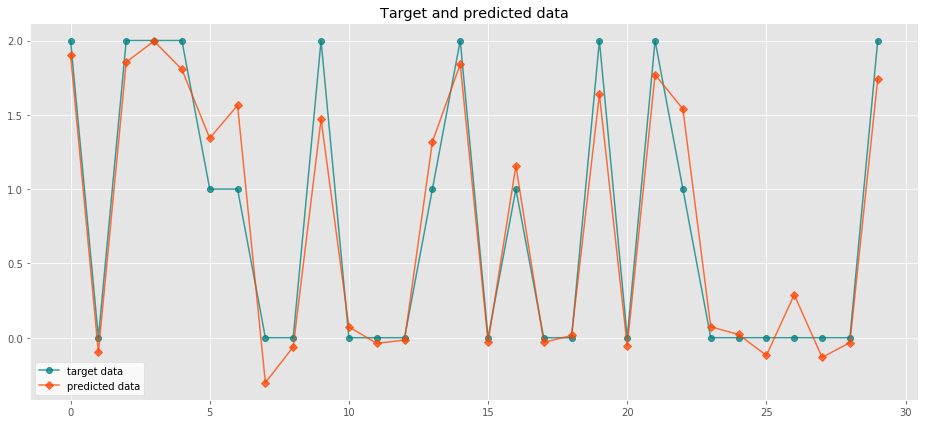

In [82]:
fig = plt.figure(figsize=(13, 6))  # set figure and its size

x = [i for i in range(len(y_test))]  # x-axis values

plt.title('Target and predicted data')  # plot title

# target data plot
plt.plot(x, y_test, '-o', color='teal', label='target data', alpha=0.75)
# predicted data plot
plt.plot(x, y_pred, '-D', color='orangered', label='predicted data',
         alpha=0.75)

plt.legend(facecolor='white')  # plot legend
plt.tight_layout()  # set tight layout
plt.show()  # show plot

### Cross-validation

As we see, our model predicts the target values fairly well, but *could it be better*? Maybe, by selecting another number of PLSR components for our model.

The suggested way to determine the optimal number of PLSR components to keep doing this is using the *cross-validation* method. Cross-validation splits the data to multiple training and test sets and then provides an estimate (score) on how well our model is performing on every splitted set. The highest the score, the better our model performs. We will use the **sklearn.model_selection.cross_val_score()** function to cross-validate the training data.

In [24]:
from sklearn.model_selection import cross_val_score

In [83]:
# initialize cross-validation scores list
cv_scores = []

print('Cross-validation scores:')

for i in range(x_train.shape[1]):
    # create plsr object
    plsi = PLSRegression(n_components=i + 1, max_iter=500, scale=False)
    # fit plsr object
    plsi.fit(x_train, y_train)
    # calculate cross-validation score
    score = cross_val_score(plsi, x_train, y_train, cv=5)
    # append score to cross-validation scores list
    cv_scores.append(score)
    # print cross-validation scores for each number of plsr components
    print('Components: {:2d}: {}'.format(i + 1, cv_scores[i]))

Cross-validation scores:
Components:  1: [ 0.92607915  0.80969928  0.83902629  0.92610579  0.88213008]
Components:  2: [ 0.93944677  0.88475383  0.85847678  0.93155921  0.91635111]
Components:  3: [ 0.94750768  0.88275306  0.89508841  0.95115666  0.91857926]
Components:  4: [ 0.94821772  0.88430437  0.89576383  0.93589557  0.91970402]


The **cross_val_score()** function calculates the cross-validation score for each splitted train/test set. The number of train/test sets is defined by the `cv` parameter. It is obvious that the more components we take into account, the higher the score (with minor fluctuations - not really obvious in this dataset).

A more meaningful way to display cross-validation scores is by displaying the mean cross validation score +/- the standard deviation for each number of components, instead of dipslaying the cross-validation score for for every train/test set. This can be done by using the numpy's **mean()** and **std()** attributes.

In [26]:
cv_scores_mean = []
cv_scores_std = []

print('Cross-validation scores:')

for i in range(len(cv_scores)):
    cv_scores_mean.append(cv_scores[i].mean())
    cv_scores_std.append(cv_scores[i].std())
    print('Components: {:2d}: {:.2f} (+/- {:.2f})'
          .format(i + 1, cv_scores_mean[i], cv_scores_std[i]))

Cross-validation scores:
Components:  1: 0.88 (+/- 0.05)
Components:  2: 0.91 (+/- 0.03)
Components:  3: 0.92 (+/- 0.03)
Components:  4: 0.92 (+/- 0.02)


It is useful to plot these cross-validation scores as a function of the number of components used for the PLSR.

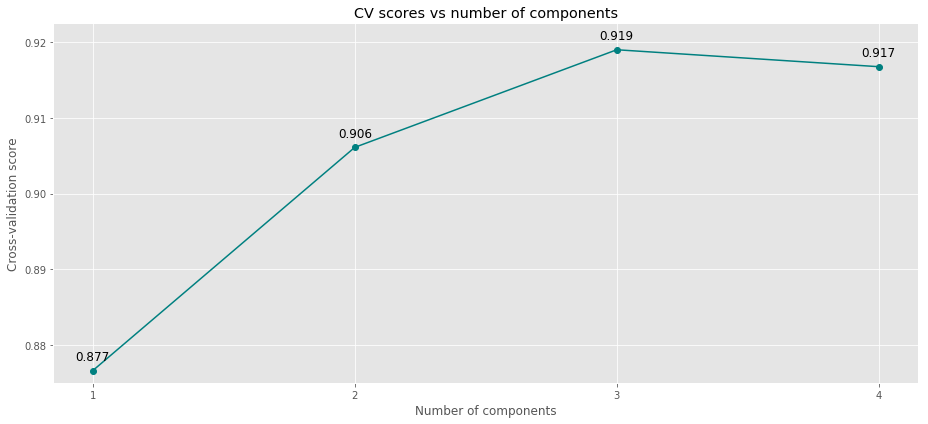

In [221]:
# set figure, ax objects and figure size
fig, ax = plt.subplots(figsize=(13, 6))

x = [i for i in range(len(cv_scores_mean))]  # x-axis values

plt.title('CV scores vs number of components')  # plot title

plt.plot(x, cv_scores_mean, '-o', color='teal')  # cv_scores_mean plot

### text over line-points  ###
yticks = ax.get_yticks()  # get y-axis ticks positions
offset = (yticks[-1] - yticks[-2]) * 0.1  # calculate y-axis offset

for i in range(len(cv_scores_mean)):
    ax.text(x[i], cv_scores_mean[i] + offset,  # x-y coordinates
            format(cv_scores_mean[i], '.3f'),  # text and formatting
            ha='center',  # horizontal alignment
            va='bottom',  # vertical alignment
            fontsize=12)  # font size

plt.ylim(0.875, 0.9225)  # y-axis limits
plt.xticks(x)  # x-ticks positions
# x-ticks labels
ax.set_xticklabels(i + 1 for i in range(len(cv_scores_mean)))
plt.xlabel('Number of components')  # x-axis label
plt.ylabel('Cross-validation score')  # y-axis label

plt.tight_layout()  # set tight layout
plt.show()  # show plot

As shown in the above plot, there is a small maximum at 3 components. However, it is clear that the difference between using 2 components and more than 2 is so small that our model should provide satisfactory results even with only 2 components.

In [80]:
# create plsr model object
pls = PLSRegression(n_components=2, max_iter=500, scale=False)
# fit plsr model to the training data
pls.fit(x_train, y_train)

PLSRegression(copy=True, max_iter=500, n_components=2, scale=False, tol=1e-06)

### PLSR scores

The PLSR scores describe the position of each sample in each determined latent vector (LV). We can have a look at the PLSR scores usind the **x\_scores\_** and **y\_scores\_** attributes.

In [29]:
pls.x_scores_[0:5, :]  # print first 5 x_scores

array([[ 0.12472832, -0.71643029],
       [-2.51844085, -0.21580122],
       [ 1.84177389,  0.14275068],
       [-2.2301735 ,  0.05011562],
       [-0.52243206, -0.7188879 ]])

In [30]:
pls.y_scores_[0:5, :]  # print first 5 y_scores

array([[-0.12959527,  0.38668628],
       [-2.3512284 , -0.25423817],
       [ 2.09203787, -0.38051385],
       [-2.3512284 ,  0.18405792],
       [-0.12959527, -0.59728869]])

### PLS-DA

The PLSR **x\_scores\_** are usually used in Partial Least Squares Discriminant Analysis (PLS-DA), a technique used for the classification and discrimination of data, similar to PCA. The technique consists of plotting the **x\_scores\_** components of the PLSR against each other. To make the clustering of the data more prominent, we will use different colors for each flower class and a custom **cov_ellipse()** function to plot the 95% covariance error ellipses for each class cluster. The **cov_ellipse()** function is basically an implementation of the **matplotlib.patches.Ellipse()** function.

In [31]:
def cov_ellipse(x, y, conf_int=0.05, fill=False, linewidth=1.5,
                linestyle='-', edgecolor='black', facecolor='black',
                alpha=1):
    '''
    Draws the covariance error ellipse for a set of data. By default the 95%
    confidence interval is drawn.

    conf_int: the confidence interval of the chi-square distribution for
    df=2 (two degrees of freedom). The possible chi-square probability values
    for a given confidence interval are:
    chi2_prob = {0.995: 0.010,
                 0.99: 0.020,
                 0.975: 0.051,
                 0.95: 0.103,
                 0.90: 0.211,
                 0.10: 4.605,
                 0.05: 5.991,
                 0.025: 7.378,
                 0.01: 9.210,
                 0.005: 10.597}
    For example, the 95% confidence interval (1 - 0.95 = 0.05) corresponds to 
    a chi-square probability of 5.991.
    More information on chi-square distribution:
    https://faculty.elgin.edu/dkernler/statistics/ch09/9-3.html
    '''

    from matplotlib.patches import Ellipse  # import Ellipse

    cov_mat = np.cov(x, y)  # calculate the covariance matrix
    # find the eigenvalues and eigenvectors of the covariance matrix
    evals, evecs = np.linalg.eig(cov_mat)
    # create eigenvalue-eigenvectors pairs
    eig_pairs = [(np.abs(evals[i]), evecs[:, i]) for i in range(len(evals))]
    # sort the eigenvalue-eigenvectors pairs (low to high)
    eig_pairs.sort()
    # reverse the eigenvalue-eigenvectors pairs sort order (high to low)
    eig_pairs.reverse()

    # abbreviations
    a = eig_pairs[0][0]
    b = eig_pairs[1][0]
    ev0 = eig_pairs[0][1][0]
    ev1 = eig_pairs[0][1][1]

    # chi-square probabilities
    chi2_prob = {0.995: 0.010,
                 0.99: 0.020,
                 0.975: 0.051,
                 0.95: 0.103,
                 0.90: 0.211,
                 0.10: 4.605,
                 0.05: 5.991,
                 0.025: 7.378,
                 0.01: 9.210,
                 0.005: 10.597}

    ax = plt.gca()  # create ax object from current figure

    ax.add_patch(Ellipse((np.mean(x), np.mean(y)),  # center points
                         2 * np.sqrt(chi2_prob[conf_int] * a),  # big axis
                         2 * np.sqrt(chi2_prob[conf_int] * b),  # small axis
                         alpha=alpha,  # transparency
                         fill=fill,  # fill
                         facecolor=facecolor,  # fill color
                         edgecolor=edgecolor,  # line color
                         linewidth=linewidth,  # line width
                         linestyle=linestyle,  # line style
                         angle=np.degrees(np.arctan(ev1 / ev0))))  # big axis angle

In [124]:
# colors
colors = {0: 'teal',
          1: 'orangered',
          2: 'olive'}
# classes
classes = {0: 'Iris-Setosa',
           1: 'Iris-Versicolor',
           2: 'Iris-Virginica'}

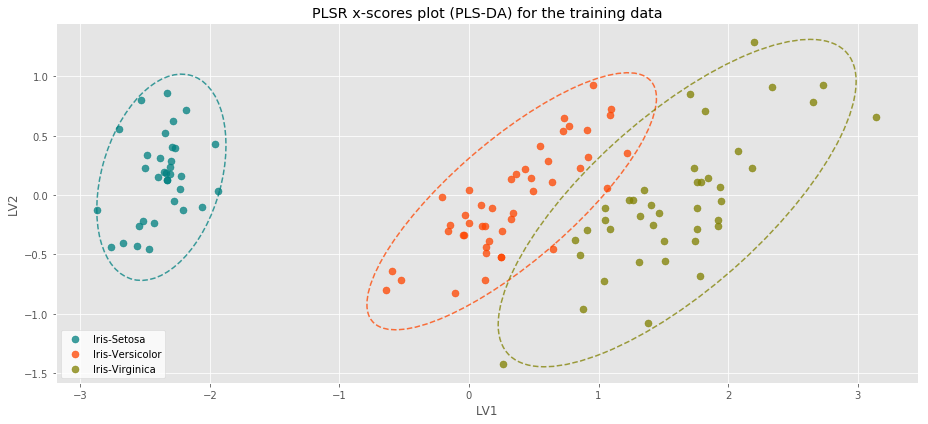

In [128]:
fig = plt.figure(figsize=(13, 6))  # set figure and its size

plt.title('PLSR x-scores plot (PLS-DA) for the training data')  # plot title

for key in colors:
    # scatter plot
    plt.scatter(pls.x_scores_[y_train.target == key, 0],  # x-axis values
                pls.x_scores_[y_train.target == key, 1],  # y-axis values
                color=colors[key],  # color
                s=50,  # marker size
                alpha=0.75,  # transparency
                label=classes[key])
    # error ellipse
    cov_ellipse(pls.x_scores_[y_train.target == key, 0],  # x origin
                pls.x_scores_[y_train.target == key, 1],  # y origin
                edgecolor=colors[key],  # line color
                linestyle='--',  # line style
                alpha=0.75)  # transparency

plt.xlabel('LV1')  # x-axis label
plt.ylabel('LV2')  # y-axis label

plt.legend(facecolor='white')  # plot legend
plt.tight_layout()  # set tight layout
plt.show()  # show plot

We see that there are three different clusters, one for each flower class. The Iris-Setosa cluster is clearly separated from the other two, which are slightly overlapping.

We can also plot the PLSR **y\_scores\_** against each other, which is useful in some situations.

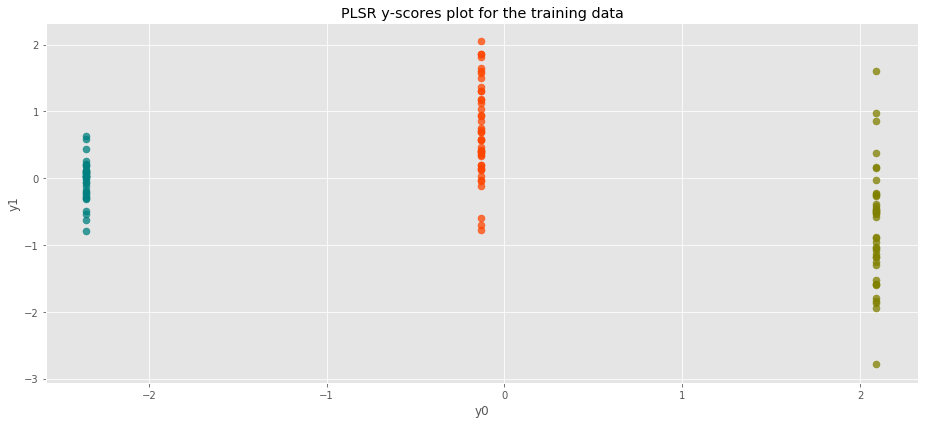

In [129]:
fig = plt.figure(figsize=(13, 6))  # set figure and its size

plt.title('PLSR y-scores plot for the training data')  # plot title

for key in colors_labels:
    # scatter plot
    plt.scatter(pls.y_scores_[y_train.target == key, 0],  # x-axis values
                pls.y_scores_[y_train.target == key, 1],  # y-axis values
                color=colors[key],  # color
                s=50,  # marker size
                alpha=0.75)  # transparency

plt.xlabel('y0')  # x-axis label
plt.ylabel('y1')  # y-axis label

plt.tight_layout()  # set tight layout
plt.show()  # show plot

### PLSR confusion matrix

The confusion matrix is a square matrix which is used in PLSR to evaluate the classification accuracy of the model. The columns of the matrix represent the values predicted by the PLSR model for the training or testing data, while the rows represent the true values of the corresponding data. The confusion matrix can be calculated using the **sklearn.metrics.confusion_matrix()** function. For binary problems, the function returns a tuple of true negatives, false positives, false negatives and true positives, as documented in the [function's documentation](http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix).

Here we will calculate the confusion matrix for the training data. As we have already seen, the `y_train` array contains integer values of 0, 1 and 2, corresponding to the three different Iris flower classes. The corresponding predicted data array, however, will contain float numbers. In order to calculate the matrix we have to round the predicted data array values to make them integer, so that they can be compared to the `y_train values`, by using the **numpy.round()** function.

In [35]:
from sklearn.metrics import confusion_matrix

In [86]:
# get rounded predicted values for the training data
y_train_pred = [np.round(i) for i in pls.predict(x_train)]
y_train_pred[0:5]  # print first 5 elements

[array([ 1.]), array([-0.]), array([ 2.]), array([ 0.]), array([ 1.])]

In [90]:
# calculate confusion matrix
conf_mat = confusion_matrix(y_train_pred, y_train)
# print confusion matrix
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[34  0  0]
 [ 0 43  0]
 [ 0  2 41]]


As we see, our model predicts correctly that 34 out of 120 flowers belong to the class labeled as 0, i.e. Iris-Setosa, 45 out of 120 flowers belong to the class labeled as 1, i.e. Iris-Versicolor, with the true value of Iris-Versicolor being 43, and 41 out of 120 flowers belong to the class labeled as 2, i.e. Iris-Virginica, with the true value of Iris-Virginica being 43. So, we conclude that our model works pretty well discriminating between the Iris-Setosa flowers and the rest, but there is a slight confusion between the Iris-Versicolor and the Iris-Virginica flowers, which can also be seen in the PLS-DA plot.

Sometimes it is useful to have the normalized confusion matrix, which is calculated by dividing the elements of a matrix row with the corresponding row sum.

In [91]:
# calculate normalized confusion matrix
conf_mat_norm = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]
# print normalized confusion matrix
print('Normalized confusion matrix:')
print(conf_mat_norm)

Normalized confusion matrix:
[[ 1.          0.          0.        ]
 [ 0.          1.          0.        ]
 [ 0.          0.04651163  0.95348837]]


In the code above, we used the **numpy.newaxis** object to, essentially, convert the row sums to a column vector, by which the confusion matrix is divided.

A more visually appealing way to show the confusion matrix is by using matplotlib. The following function can be used to plot the normalized and unnormalized confusion matrices for a calculated confusion matrix.

In [230]:
import itertools

In [231]:
def plot_confusion_matrix(conf_mat, classes, normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Blues):
    '''
    Plot the confusion matrix.
    Set normalize=True to plot the normalized confusion matrix.
    '''

    # check whether we want to plot the normalized or the unnormalized
    # confusion matrix
    if normalize:
        # calculate the normalized confusion matrix
        conf_mat = conf_mat / conf_mat.sum(axis=1)[:, np.newaxis]
#         print('Normalized confusion matrix')
    else:
        conf_mat
#         print('Confusion matrix, no normalization')
#     print(conf_mat)

    # threshold to decide the plot's text color
    thresh = conf_mat.max() / 2
    # format of plot's text (decimal for normalized else integer)
    fmt = '.2f' if normalize else 'd'

    fig = plt.figure(figsize=(5, 5))  # set figure and figure size

    plt.title(title)  # plot title

    # plot matrix as image
    plt.imshow(conf_mat,  # matrix
               interpolation='nearest',  # interppolation type
               cmap=cmap)  # colormap
    # plot colorbar
    plt.colorbar(shrink=0.7)  # shrink colorbar

    # instead of itertools.product a nested for-loop can be used
    for i, j in itertools.product(range(conf_mat.shape[0]),
                                  range(conf_mat.shape[1])):
        # plot text
        plt.text(j, i,  # text coordinates
                 format(conf_mat[i, j], fmt),  # text format
                 ha='center',  # horizontal alignment
                 va='center',  # vertical alignment
                 # text color
                 color='white' if conf_mat[i, j] > thresh else 'black',
                 fontsize=10)  # font size

    ticks = [i for i in range(len(classes))]  # ticks positions
    plt.xticks(ticks, classes,  # set ticks names
               rotation=45)  # set ticks angle
    plt.yticks(ticks, classes)  # set ticks names

    plt.xlabel('Predicted class')  # x-axis label
    plt.ylabel('True class')  # y-axis label

    plt.grid(None)  # don't show grid

    plt.tight_layout()  # set tight layout
    plt.show()  # show plot

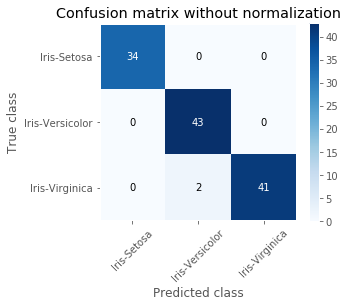

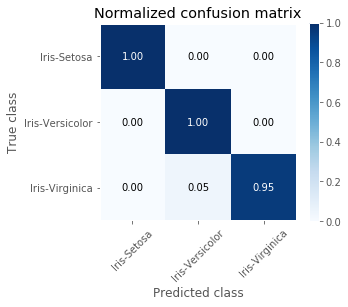

In [232]:
# plot unnormalized confusion matrix
plot_confusion_matrix(conf_mat, classes.values(),
                      title='Confusion matrix without normalization')
# plot unnormalized confusion matrix
plot_confusion_matrix(conf_mat, classes.values(),
                      normalize=True, title='Normalized confusion matrix')

### PLSR equation

The final step of the PLSR is to derive the PLSR equation. As stated in the introduction, the PLSR equation is given by
$$
\mathbf{Y} = \mathbf{UQ^{\mathrm{T}}} + \mathbf{F},
$$
where $\mathbf{U}$ is the $n \times l$ score matrix, $\mathbf{Q}$ is the $p \times l$ loading matrix and $\mathbf{F}$ is the  $n \times p$ error term for $\mathbf{Y}$.


In [233]:
# plsr equation
Y = pls.y_scores_.dot(pls.y_loadings_.T)
Y[0:5, :]  # show first 5 rows

array([[-0.17280929],
       [-0.98306778],
       [ 1.05431532],
       [-1.11282248],
       [ 0.1184901 ]])

We can plot the PLSR equation along with a first order polynomial fit, which fits the data pretty well.

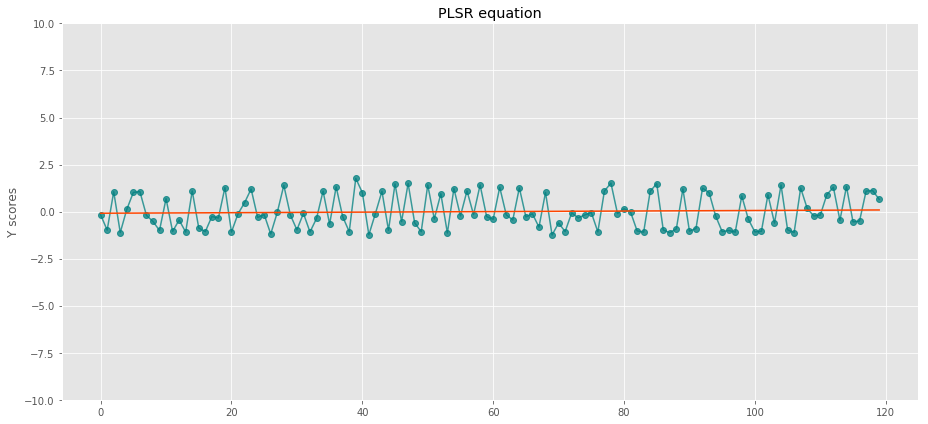

In [239]:
plt.figure(figsize=(13, 6))  # set figure and its size

x = [i for i in range(len(Y))]  # x-axis values

plt.title('PLSR equation')  # plot title

fit = np.polyfit(x, Y, 1)  # 1st order polynomial fit

plt.plot(x, Y, '-o', color='teal', alpha=0.75)  # plot plsr equation
plt.plot(x, fit[1] + fit[0] * x, color='orangered')  # plot fit

plt.ylabel('Y scores')

plt.ylim(-10, 10)  # plot limits

plt.tight_layout()  # set tight layout
plt.show()  # show plot